# Nadam v. Adam: Linear Regression

The purpose of this notebook is to compare ADAM and NADAM on a linear regression problem. Data was obtained from the numpy files given in EE381K: HW 1, problem 1.

In [126]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

%matplotlib inline

In [127]:
def calc_grad(x, A, b):
    grad = np.dot(A.T, (np.dot(A,x) - b))
    return grad

In [128]:
def adam(x, v, m, A, b, t):  
    beta1 = .9
    beta2 = .999
    eta = 1e-2 # step size
    epsilon = int(1e-8) # to avoid division by zero in x_update
    
    g = calc_grad(x, A, b)
    g_sq = np.square(g) # gradient squared (element-wise)
    
    # update v, m: exp-decay avg of grad, grad^2
    v_new = beta2*v + (1-beta2)*g_sq
    m_new = beta1*m + (1-beta1)*g 
    # bias correct v, m
    v_hat = v_new / (1-beta2)
    m_hat = m_new / (1-beta1)
    
    # update x
    x_new = x - (eta / (np.sqrt(v_hat) + epsilon) ) * m_hat
    
    return x_new, v_new, m_new

In [139]:
def nadam(x, m, prod_mu, n, t, A=0, b=0, regularize=0,num_class=0):
    mu = .99 #beta1
    nu = .999 #beta2
    eta = 1e-2
    
    grad = calc_grad(x, A, b)
    mu_t = mu*(1 - 0.5*.96**(t/250))
    mu_t_1 = mu*(1 - 0.5*.96**((t+1)/250))
    prod_mu = prod_mu*mu_t
    prod_mu_1 = prod_mu*mu_t_1
    g_hat = grad/(1-prod_mu)
    m = mu*m+(1-mu)*grad
    
    m_hat = m/(1-prod_mu_1)
    n = nu*n + (1-nu)*np.multiply(grad, grad)
    n_hat = n/(1-nu**t)
    m_bar = (1 - mu_t)*g_hat + mu_t_1*m_hat
    
    eps = 1e-8
    x = x - eta*np.multiply(m_bar, 1/(n_hat**0.5 + eps))
    return x, m, n, prod_mu

In [140]:
def descent_adam(A, b, T):
    x = np.zeros(A.shape[1]) # initialize x
    v = np.zeros(A.shape[1]) # initialize v: exp-decay avg of grad^2
    m = np.zeros(A.shape[1]) # initialize m: exp-decay avg of grad
    
    err = []
    
    for t in xrange(T):
        x, v, m = adam(x, v, m, A, b, t)  
        err.append(la.norm(np.dot(A,x) - b))
    
    return x, err

In [141]:
def descent_nadam(A, b, T):
    x = np.zeros(A.shape[1]) # initialize x
    n = np.zeros(A.shape[1]) # initialize v: exp-decay avg of grad^2
    m = np.zeros(A.shape[1]) # initialize m: exp-decay avg of grad
    
    err = []
    prod_mu = 1
    
    for t in xrange(T):
        x, m, n, prod_mu = nadam(x, m, prod_mu, n, t+1, A, b)
        err.append(la.norm(np.dot(A,x) - b))   
        
    return x, err

In [142]:
def main():
    A = np.load("A.npy")
    b = np.load("b.npy")
    T = int(2e2)

    x_ad, err_ad = descent_adam(A, b, T)
    x_nad, err_nad = descent_nadam(A, b, T)
    
    # Plot Error
    plt.clf()
    plt.plot(err_ad, label = 'ADAM')
    plt.plot(err_nad, label = 'NADAM')
    plt.legend()
    plt.xlabel('Iteration')
    plt.title('Error')

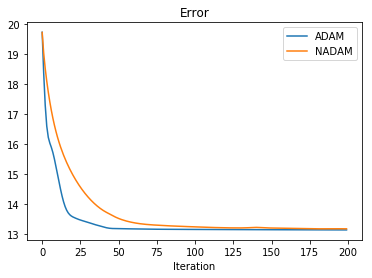

In [143]:
main()

As we can see, the error of Adam decreases faster than that of Nadam for this linear regression example.